## Uploading and exploring the dataset

In [78]:
#pip install pvanalytics
#pip install pvlib

In [309]:
pip show pvanalytics

Name: pvanalytics
Version: 0.2.0
Summary: PVAnalytics is a python library for the analysis of photovoltaic system-level data.
Home-page: https://github.com/pvlib/pvanalytics
Author: pvanalytics Contributors
Author-email: 
License: MIT
Location: c:\users\tonea\appdata\local\programs\python\python310\lib\site-packages
Requires: numpy, pandas, pvlib, scikit-image, scipy, statsmodels
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [142]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
from pvanalytics import quality
from pvlib import temperature
import matplotlib.dates as mdates

In [80]:
#Downloading the dataset
file_path = '../module_temperature_dataset'

# Read data from pkl-file:
file = open(file_path , 'rb')
data_dict = pickle.load(file)
file.close()


In [81]:
data_dict

{'module_temperature_df':                      PT JKM325 nr 1 [°C]  PT JKM325 nr 2 [°C]  \
 Timestamp                                                       
 2021-01-01 00:00:00                 0.06                 0.07   
 2021-01-01 00:05:00                 0.06                 0.07   
 2021-01-01 00:10:00                 0.06                 0.07   
 2021-01-01 00:15:00                 0.06                 0.07   
 2021-01-01 00:20:00                 0.05                 0.06   
 ...                                  ...                  ...   
 2024-08-12 23:35:00                11.28                11.17   
 2024-08-12 23:40:00                10.84                10.85   
 2024-08-12 23:45:00                10.69                10.66   
 2024-08-12 23:50:00                10.56                10.56   
 2024-08-12 23:55:00                10.45                10.41   
 
                      PT JKM325 nr 3 [°C]  PT JKM335 nr 1 [°C]  \
 Timestamp                                       

In [82]:
#Extracting the different dataframes from the dictionary
module_temperature_df = data_dict['module_temperature_df']
irradiance_df = data_dict['irradiance_df']
weather_data_df = data_dict['weather_data_df']

In [83]:

module_temperature_df = module_temperature_df.dropna(how='all')
module_temperature_df = module_temperature_df.sort_values(by='Timestamp')

In [308]:
irradiance_df

,Irradiance (IRR Hor - SunP) [W/m²],Irradiance (IRR Plan - SunP) [W/m²],Irradiance (IRR Plan - Talesun) [W/m²],Irradiance (IRR Plan - JKM325) [W/m²],Irradiance (IRR Plan - JKM335) [W/m²],Irradiance (SMP10 Sunpower plan) [W/m²],Irradiance (SMP10 Sunpower horisontal) [W/m²],Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²]
Timestamp,,,,,,,,,,
2021-01-01 00:00:00+00:00,0.27,1.30,0.21,0.20,1.30,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:05:00+00:00,0.27,1.30,0.21,0.20,1.30,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:10:00+00:00,0.26,1.31,0.21,0.20,1.30,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:15:00+00:00,0.27,1.30,0.21,0.21,1.30,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:20:00+00:00,0.27,1.30,0.21,0.20,1.30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-12 21:35:00+00:00,1.03,2.23,0.98,2.22,2.41,-3.0,-5.20,NaN,-4.0,NaN
2024-08-12 21:40:00+00:00,1.02,2.18,0.89,2.11,2.36,-3.0,-5.00,NaN,-4.0,NaN
2024-08-12 21:45:00+00:00,1.04,2.15,0.96,2.20,2.40,-3.0,-5.55,NaN,-4.0,NaN


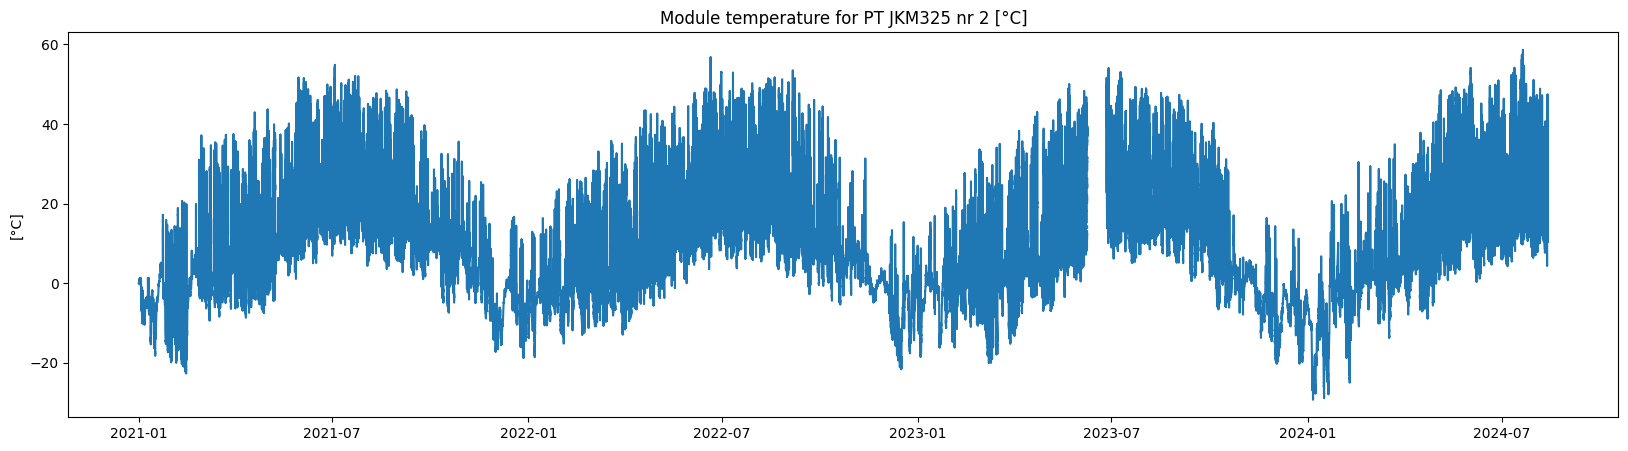

In [85]:
'''print(module_temperature_df.columns)
print(module_temperature_df.index)
print(len(module_temperature_df["PT JKM325 nr 2 [°C]"]))
'''
plt.figure(figsize=(20,5))
plt.plot(module_temperature_df["PT JKM325 nr 2 [°C]"])
plt.title("Module temperature for PT JKM325 nr 2 [°C]")
plt.ylabel("[°C]")
plt.show()

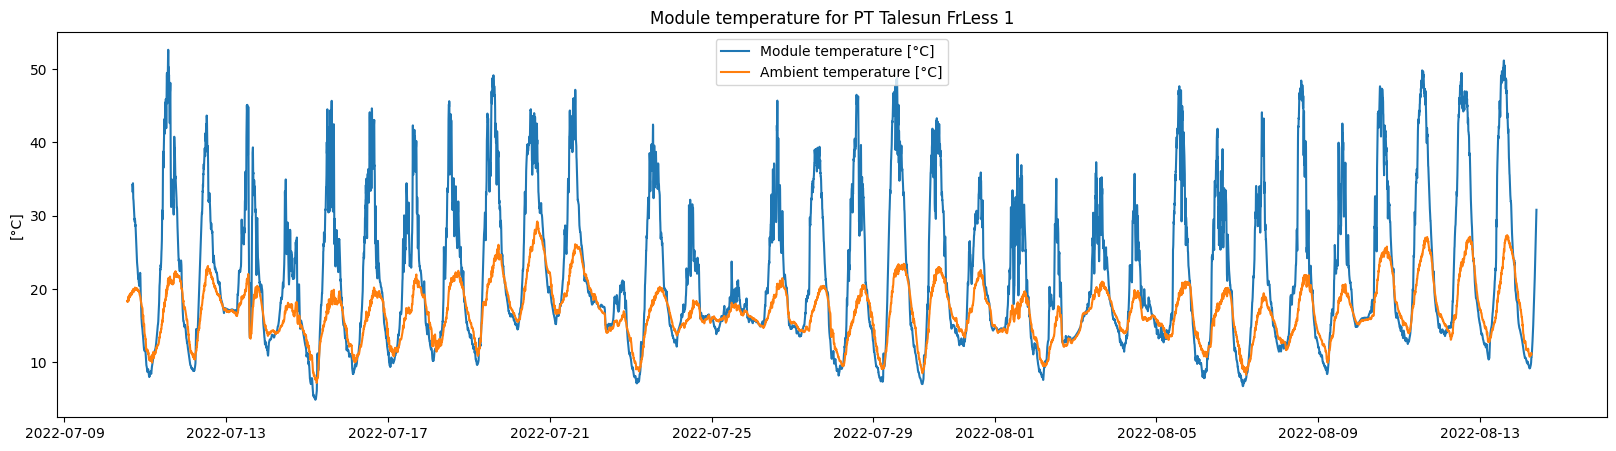

In [86]:
def plot_features(panel_id, index_start, index_end):
    plt.figure(figsize=(20,5))
    plt.plot(module_temperature_df[panel_id+" [°C]"][index_start:index_end], label="Module temperature [°C]")
    #plt.plot(module_temperature_df["PT Talesun FrLess 1 [°C]"][index_start:index_end], label="Module temperature bifacial [°C]")
    #plt.plot(irradiance_df["Irradiance (IRR Hor - SunP) [W/m²]"][index_start:index_end], label="Irradiance")
    plt.plot(weather_data_df["WS500_1_Temperature [°C]"][index_start:index_end], label="Ambient temperature [°C]")
    plt.title("Module temperature for "+panel_id)
    plt.ylabel("[°C]")
    plt.legend()
    plt.show()

plot_features('PT Talesun FrLess 1', 160000, 170000)
#plot_features('PT JKM335 nr 2', 160000, 162000)

In [87]:
MIN_DATE = pd.to_datetime('2021-01-01 00:00:00+00:00')
MAX_DATE = pd.to_datetime('2024-08-12 23:55:00+00:00')


#Converting the data from CET timezone to UTC
irradiance_df = irradiance_df.tz_localize('CET', ambiguous=False, nonexistent='NaT')
module_temperature_df = module_temperature_df.tz_localize('CET', ambiguous=False, nonexistent='NaT')
weather_data_df = weather_data_df.tz_localize('CET', ambiguous=False, nonexistent='NaT')

irradiance_df = irradiance_df.loc[irradiance_df.index.dropna()]
module_temperature_df = module_temperature_df.loc[module_temperature_df.index.dropna()]
weather_data_df = weather_data_df.loc[weather_data_df.index.dropna()]


irradiance_df = irradiance_df.tz_convert('UTC').asfreq('5 min').loc[MIN_DATE:MAX_DATE]
module_temperature_df = module_temperature_df.tz_convert('UTC').asfreq('5 min').loc[MIN_DATE:MAX_DATE]
weather_data_df = weather_data_df.tz_convert('UTC').asfreq('5 min').loc[MIN_DATE:MAX_DATE]

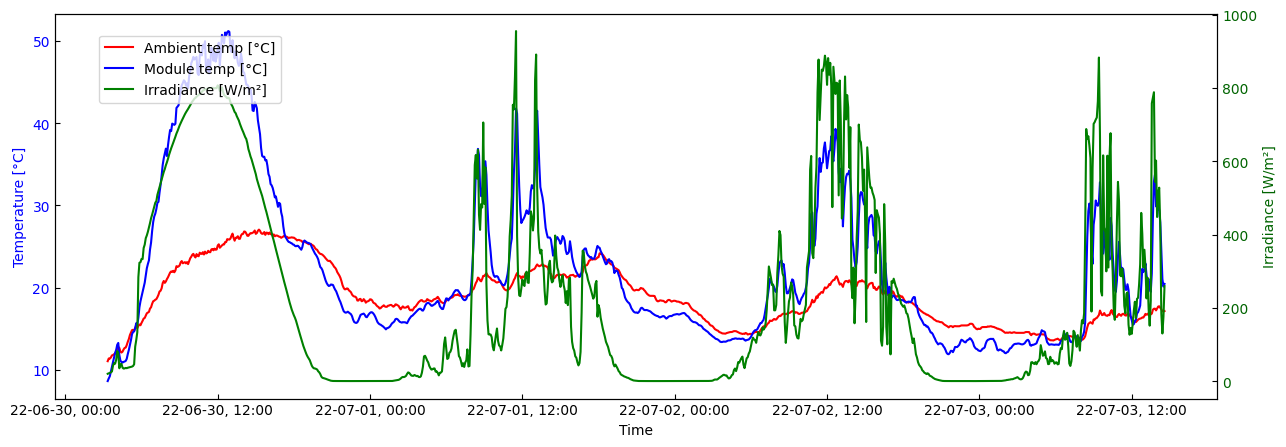

"ax2.xaxis.set_major_locator(mdates.AutoDateLocator())  \n    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  \n    ax2.tick_params(direction='in')"

In [147]:
fra=157000
til=158000

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(weather_data_df.index[fra:til], weather_data_df["WS500_1_Temperature [°C]"][fra:til], label="Ambient temp [°C]", color="r")
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature [°C]', color='b')
ax1.tick_params(axis='y', labelcolor='b', direction="in")
ax1.tick_params(axis="x", direction="in")
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d, %H:00'))


ax2 = ax1.twinx()
ax2.plot(irradiance_df.index[fra:til], irradiance_df["Irradiance (IRR Hor - SunP) [W/m²]"][fra:til], label="Irradiance [W/m²]", color="g")
ax2.set_ylabel('Irradiance [W/m²]', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen', direction="in")

ax1.plot(module_temperature_df.index[fra:til], module_temperature_df["PT SunP nr 1 [°C]"][fra:til], label="Module temp [°C]", color="b")

fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.85))

plt.show()


"""ax2.xaxis.set_major_locator(mdates.AutoDateLocator())  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
    ax2.tick_params(direction='in')"""


DatetimeIndex(['2022-06-30 03:20:00+00:00', '2022-06-30 03:25:00+00:00',
               '2022-06-30 03:30:00+00:00', '2022-06-30 03:35:00+00:00',
               '2022-06-30 03:40:00+00:00', '2022-06-30 03:45:00+00:00',
               '2022-06-30 03:50:00+00:00', '2022-06-30 03:55:00+00:00',
               '2022-06-30 04:00:00+00:00', '2022-06-30 04:05:00+00:00',
               ...
               '2022-07-02 21:10:00+00:00', '2022-07-02 21:15:00+00:00',
               '2022-07-02 21:20:00+00:00', '2022-07-02 21:25:00+00:00',
               '2022-07-02 21:30:00+00:00', '2022-07-02 21:35:00+00:00',
               '2022-07-02 21:40:00+00:00', '2022-07-02 21:45:00+00:00',
               '2022-07-02 21:50:00+00:00', '2022-07-02 21:55:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Timestamp', length=800, freq='5min')


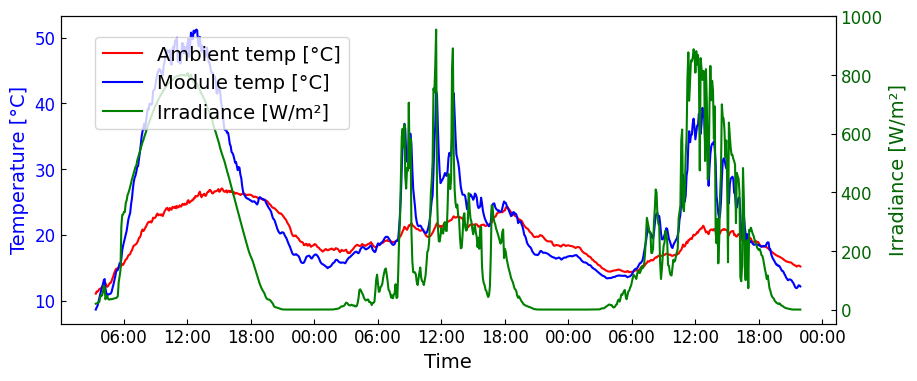

In [307]:
fra=157000
til=157800
print(weather_data_df.index[fra:til])
fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(weather_data_df.index[fra:til], weather_data_df["WS500_1_Temperature [°C]"][fra:til], label="Ambient temp [°C]", color="r")
ax1.set_xlabel('Time', size=14)
ax1.set_ylabel('Temperature [°C]', color='b', size=14)
ax1.tick_params(axis='y', labelcolor='b', direction="in", labelsize=12)
ax1.tick_params(axis='x', direction="in", labelsize=12)

ax1.plot(module_temperature_df.index[fra:til], module_temperature_df["PT SunP nr 1 [°C]"][fra:til], label="Module temp [°C]", color="b")


ax2 = ax1.twinx()
ax2.plot(irradiance_df.index[fra:til], irradiance_df["Irradiance (IRR Hor - SunP) [W/m²]"][fra:til], label="Irradiance [W/m²]", color="g")
ax2.set_ylabel('Irradiance [W/m²]', color='darkgreen', size=14)

#ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=12))
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0, fontsize=14)  
#plt.setp(ax2.xaxis.get_minorticklabels(), rotation=0, fontsize=10, color="gray")
ax2.tick_params(axis='x', which='major', pad=25, direction="in", labelsize=12)  
ax2.tick_params(axis='y', labelcolor="darkgreen")  
#ax2.tick_params(axis='x', which='minor', pad=5, labelsize=9, labelcolor="gray",direction="in")
ax2.tick_params(which="both", direction="in", labelsize=12)

fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.85), fontsize=14)
plt.savefig("img/data_inspection", bbox_inches='tight')
plt.show()

In [89]:
print(len(module_temperature_df))
print(len(irradiance_df))
print(len(weather_data_df))

380136
380136
380136


In [90]:
merged_df = pd.merge(module_temperature_df, irradiance_df, left_index=True, right_index=True, how='outer')
merged_df = pd.merge(merged_df, weather_data_df, left_index=True, right_index=True, how='outer')

In [91]:
merged_df.to_csv("merged_df.csv")

In [92]:
merged_df.columns

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

In [93]:
merged_df['Irradiance (IRR Plan - SunP) [W/m²]']

Timestamp
2021-01-01 00:00:00+00:00    1.30
2021-01-01 00:05:00+00:00    1.30
2021-01-01 00:10:00+00:00    1.31
2021-01-01 00:15:00+00:00    1.30
2021-01-01 00:20:00+00:00    1.30
                             ... 
2024-08-12 21:35:00+00:00    2.23
2024-08-12 21:40:00+00:00    2.18
2024-08-12 21:45:00+00:00    2.15
2024-08-12 21:50:00+00:00    2.11
2024-08-12 21:55:00+00:00    2.18
Freq: 5min, Name: Irradiance (IRR Plan - SunP) [W/m²], Length: 380136, dtype: float64

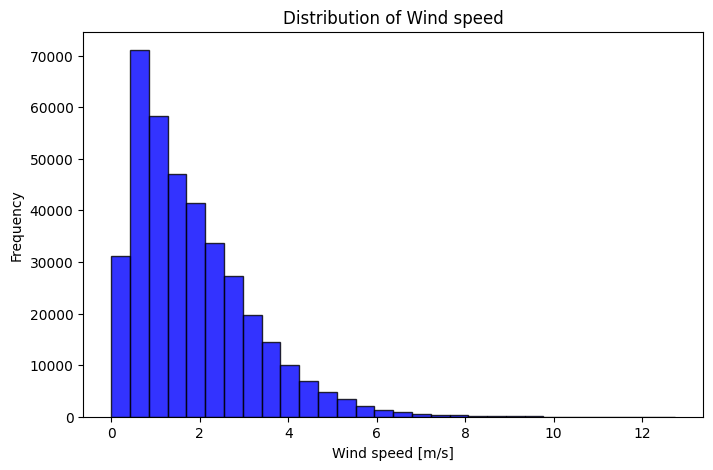

1.822940250609212


In [94]:
plt.figure(figsize=(8, 5))
plt.hist(merged_df["WS500_1_Wind speed [m/s]"], bins=30, alpha=0.8, color='blue', edgecolor='black')
plt.title('Distribution of Wind speed')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Frequency')
plt.show()
print(np.mean(merged_df["WS500_1_Wind speed [m/s]"]))

In [95]:
print(merged_df.columns)

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

## Quality checks using PVAnalytics

-Gjøre alle kvalitetssjekker, slette punkter som blir plukket ut. Så gjøre gjennomsnittsgreia, hvor man kun tar med timer med over et visst antall målinger av alle relevante verdier. 

In [96]:
#quality_irradiance = quality.irradiance(irradiance_df["Irradiance (IRR Hor - SunP) [W/m²]"])

In [97]:

def stale_values_to_nan(df):
    columnnames = ['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Temperature [°C]', 'WS500_1_Wind speed [m/s]']
    mask = pd.DataFrame()
    nan_before = df.isna().sum()
    for columnname in columnnames:
        quality_gaps = quality.gaps.stale_values_diff(df[columnname])
        mask[columnname] = quality_gaps
    for col in df.columns:
        if col not in mask.columns:
            mask[col]=np.zeros(len(mask['PT JKM325 nr 1 [°C]']))
    df = df.mask(mask==1, np.nan)
    nan_after = df.isna().sum()
    num_removed = nan_after - nan_before
    return df, num_removed

df_clean , num_removed_stale = stale_values_to_nan(merged_df.copy())

c:\Users\tonea\AppData\Local\Programs\Python\Python310\lib\site-packages\pvanalytics\quality\gaps.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [259]:
print(num_removed_stale)
print(np.sum(num_removed_stale))

PT JKM325 nr 1 [°C]                                432
PT JKM325 nr 2 [°C]                                555
PT JKM325 nr 3 [°C]                                898
PT JKM335 nr 1 [°C]                                445
PT JKM335 nr 2 [°C]                                608
PT JKM335 nr 3 [°C]                                946
PT REC nr 1 [°C]                                   451
PT REC nr 2 [°C]                                   550
PT REC nr 3 [°C]                                   489
PT SunP nr 1 [°C]                                  334
PT SunP nr 2 [°C]                                  471
PT SunP nr 3 [°C]                                  397
PT Talesun 1 [°C]                                  453
PT Talesun 2 [°C]                                  435
PT Talesun 3 [°C]                                  400
PT Talesun FrLess 1 [°C]                           493
PT Talesun FrLess 2 [°C]                           522
PT Talesun FrLess 3 [°C]                           536
Irradiance

In [299]:
def outliers_to_nan(df):
    mask = pd.DataFrame()
    for columnname in df.columns:
        outliers = quality.outliers.tukey(df[columnname], k=1.5) #returns 1 for outliers, 0 for other points
        mask[columnname] = outliers
    df = df.mask(mask==1, np.nan) 
    return df

df_outliers_removed = outliers_to_nan(merged_df.copy())

In [100]:

def  weather_limits_to_nan(df):
    mask = pd.DataFrame()

    nan_before = df.isna().sum()

    rel_hum = quality.weather.relative_humidity_limits(df['WS500_1_Humidity rel [%]']) #Returns 1 if the value is within the bounds, i.e. points with 0 should be removed. 
    mask['WS500_1_Humidity rel [%]'] = rel_hum

    #Siste 13 måneder i Kjeller: temp har variert fra -32 til 27,4 grader. https://www.yr.no/nb/historikk/tabell/5-4200/Norge/Akershus/Lillestr%C3%B8m/Kjeller?q=siste-13-m%C3%A5neder
    # 2024: -32.0 til 27.4
    # 2023: -21.8 til 30.6
    # 2022: -21.8 til 29.7
    # 2021: -23.3 til 29.8
    temp = quality.weather.temperature_limits(df['WS500_1_Temperature [°C]'], limits=(- 35.0, 40.0)) #Returns 1 if the value is within the bounds, i.e. points with 0 should be removed. 
    mask['WS500_1_Temperature [°C]'] = temp

    wind = quality.weather.wind_limits(df['WS500_1_Wind speed [m/s]'], limits=(0.0, 30.0)) #basert på vindstyrke på yr, true if it is within the bounds
    mask['WS500_1_Wind speed [m/s]'] = wind
    
    #Sets a lot of measurements to nan even with quite a low correlation_min-value
    '''irr_plans_names = ["SunP", "Talesun", "JKM325", "JKM335", "PT REC"]
    irr_plans=['Irradiance (IRR Plan - SunP) [W/m²]', 'Irradiance (IRR Plan - Talesun) [W/m²]', 'Irradiance (IRR Plan - JKM325) [W/m²]', 'Irradiance (IRR Plan - JKM335) [W/m²]', 'Irradiance (IRR Plan - SunP) [W/m²]']

    for col in mod_temp_cols:
        for i in range(len(irr_plans_names)):
            if (irr_plans_names[i] in col):
                mod_temp = quality.weather.module_temperature_check(df[col], df[irr_plans[i]], correlation_min=0.1) #True if the temp and irradiance correlates more than correlation_min. 
                #mask[col] = mod_temp #Markert ut så ikke alle modultemperaturer skal settes til nan.''' 

    for col in df.columns:
        if col not in mask.columns:
            mask[col]=np.ones(len(mask['WS500_1_Humidity rel [%]']))
    df = df.mask(mask==0, np.nan)
    nan_after = df.isna().sum()
    num_removed = nan_after - nan_before
    return df, num_removed

df_finished, num_removed_weather = weather_limits_to_nan(df_clean.copy())


In [101]:
print(num_removed_weather)

PT JKM325 nr 1 [°C]                              0
PT JKM325 nr 2 [°C]                              0
PT JKM325 nr 3 [°C]                              0
PT JKM335 nr 1 [°C]                              0
PT JKM335 nr 2 [°C]                              0
PT JKM335 nr 3 [°C]                              0
PT REC nr 1 [°C]                                 0
PT REC nr 2 [°C]                                 0
PT REC nr 3 [°C]                                 0
PT SunP nr 1 [°C]                                0
PT SunP nr 2 [°C]                                0
PT SunP nr 3 [°C]                                0
PT Talesun 1 [°C]                                0
PT Talesun 2 [°C]                                0
PT Talesun 3 [°C]                                0
PT Talesun FrLess 1 [°C]                         0
PT Talesun FrLess 2 [°C]                         0
PT Talesun FrLess 3 [°C]                         0
Irradiance (IRR Hor - SunP) [W/m²]               0
Irradiance (IRR Plan - SunP) [W

In [304]:
import plotly.graph_objs as go
import plotly.express as px

def plot_feature_after_processing_interactive(df_before, df_after, feature, a, b):
    trace1 = go.Scatter(
        x=df_before.loc[a:b].index,
        y=df_before[feature].loc[a:b],
        mode='markers',
        marker=dict(color='lightblue', opacity=0.4),
        name='Filtered out'
    )
    trace2 = go.Scatter(
        x=df_after.loc[a:b].index,
        y=df_after[feature].loc[a:b],
        mode='markers',
        marker=dict(color='blue'),
        name='Remaining points'
    )
    layout = go.Layout(
        title=feature + " after filtering out anomalies",
        xaxis_title='Index',
        yaxis_title=feature,
        width=900,
        height=500
    )
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    fig.show()



def plot_feature_after_processing(df_before, df_after, feature, a, b):
    plt.figure(figsize=(9,4))
    ax = plt.gca()
    ax.scatter(df_before.loc[a:b].index,
        df_before[feature].loc[a:b],
        label='Filtered out', alpha=1, color="skyblue")
    ax.scatter(df_after.loc[a:b].index,
        df_after[feature].loc[a:b],
        label="Remaining points", color="b")
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))    
    plt.xlabel("Time", size=14)
    plt.ylabel("Irradiance [W/m²]", size=14)
    plt.legend(fontsize=14)
    plt.tick_params(which="both", labelsize=12)
    plt.savefig("img/filtered_points", bbox_inches='tight')
    plt.show()
#14, 12

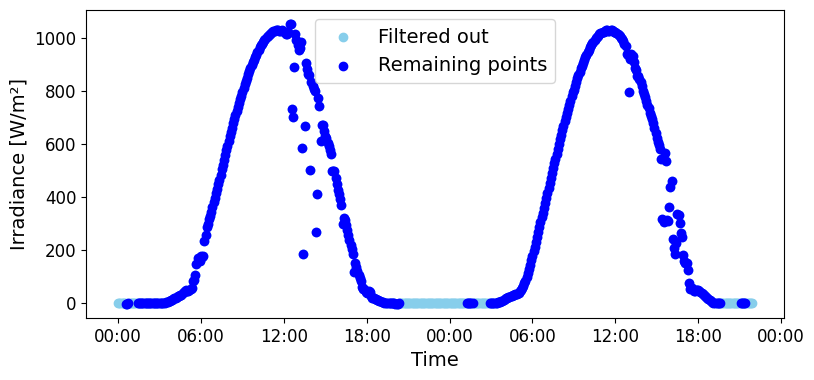

In [305]:
#plot_feature_after_processing(merged_df, df_finished, "Irradiance (SMP10 Sunpower plan) [W/m²]", 120000, 123000)
a = "2024-08-11"
b="2024-08-13"
plot_feature_after_processing(merged_df, df_finished, "Irradiance (SMP10 Sunpower plan) [W/m²]", a, b)

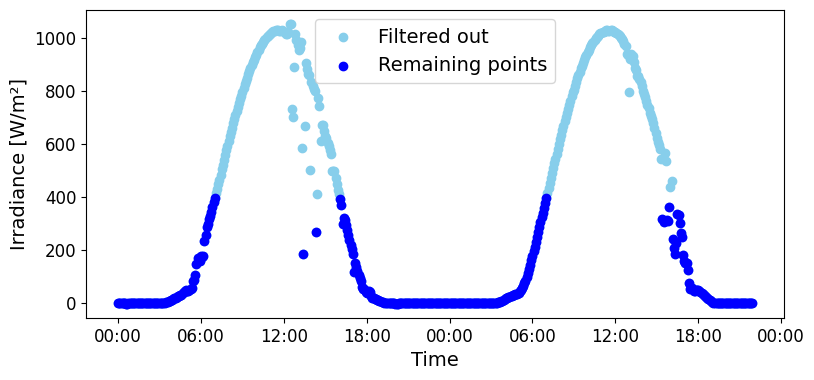

In [ ]:
a = "2024-08-11"
b = "2024-08-13"
#plot_feature_after_processing(merged_df, df_outliers_removed, "Irradiance (SMP10 Sunpower plan) [W/m²]", a, b)

Timestamp
2024-07-10 22:00:00+00:00    12.64
2024-07-10 22:05:00+00:00    12.59
2024-07-10 22:10:00+00:00    12.57
2024-07-10 22:15:00+00:00    12.54
2024-07-10 22:20:00+00:00    12.51
2024-07-10 22:25:00+00:00    12.47
2024-07-10 22:30:00+00:00    12.43
2024-07-10 22:35:00+00:00    12.40
2024-07-10 22:40:00+00:00    12.39
2024-07-10 22:45:00+00:00    12.38
2024-07-10 22:50:00+00:00    12.38
2024-07-10 22:55:00+00:00    12.37
2024-07-10 23:00:00+00:00    12.37
2024-07-10 23:05:00+00:00    12.37
2024-07-10 23:10:00+00:00    12.37
2024-07-10 23:15:00+00:00    12.37
2024-07-10 23:20:00+00:00    12.37
2024-07-10 23:25:00+00:00    12.37
2024-07-10 23:30:00+00:00    12.38
2024-07-10 23:35:00+00:00    12.39
2024-07-10 23:40:00+00:00    12.39
2024-07-10 23:45:00+00:00    12.38
2024-07-10 23:50:00+00:00    12.38
2024-07-10 23:55:00+00:00    12.38
2024-07-11 00:00:00+00:00    12.38
2024-07-11 00:05:00+00:00    12.38
2024-07-11 00:10:00+00:00    12.38
2024-07-11 00:15:00+00:00    12.37
2024-07-11

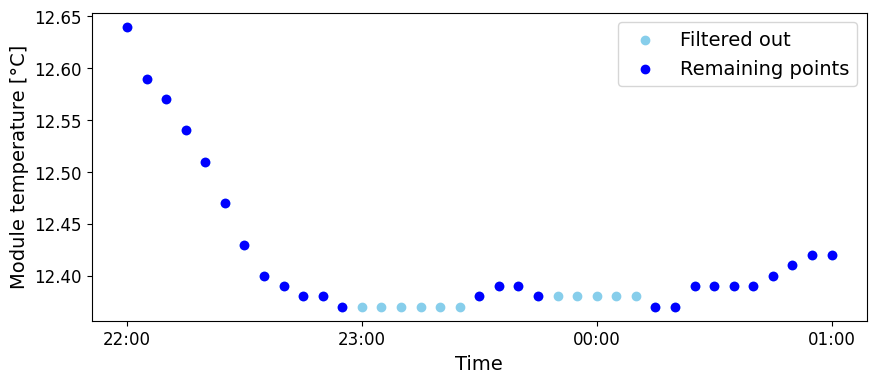

In [306]:
def plot_feature_after_processing(df_before, df_after, feature, a, b):
    plt.figure(figsize=(10,4))
    ax = plt.gca()
    print(df_before[feature].loc[a:b])
    ax.scatter(df_before.loc[a:b].index,
        df_before[feature].loc[a:b],
        label='Filtered out', alpha=1, color="skyblue")
    ax.scatter(df_after.loc[a:b].index,
        df_after[feature].loc[a:b],
        label="Remaining points", color="b")
    ax.xaxis.set_major_locator(mdates.HourLocator())  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))    
    plt.xlabel("Time", size=14)
    plt.ylabel("Module temperature [°C]", size=14)
    plt.legend(fontsize=14)
    plt.tick_params(which="both", labelsize=12)
    plt.savefig("img/filtered_points_temp", bbox_inches='tight')
    plt.show()

a = "2024-07-10 22:00:00+00:00"
b="2024-07-11 01:00:00+00:00"
plot_feature_after_processing(merged_df, df_finished, "PT REC nr 2 [°C]", a, b)

In [270]:
# Step 1: Align the two dataframes on their indices
# This will ensure that rows in df1 that are not in df2 will have NaN in df2
aligned_df = merged_df[(merged_df["PT REC nr 2 [°C]"] != df_finished["PT REC nr 2 [°C]"])]
aligned_df["PT REC nr 2 [°C]"]


Timestamp
2021-01-01 05:35:00+00:00    -1.45
2021-01-01 05:40:00+00:00    -1.45
2021-01-01 05:45:00+00:00    -1.45
2021-01-01 05:50:00+00:00    -1.45
2021-01-01 05:55:00+00:00    -1.45
                             ...  
2024-07-10 23:50:00+00:00    12.38
2024-07-10 23:55:00+00:00    12.38
2024-07-11 00:00:00+00:00    12.38
2024-07-11 00:05:00+00:00    12.38
2024-07-11 00:10:00+00:00    12.38
Name: PT REC nr 2 [°C], Length: 1396, dtype: float64

In [115]:
# Step 1: Identify rows in df1 that are not in df2
extra_points = merged_df[~merged_df.index.isin(df_finished.index)]
print(extra_points)
# Step 2: Filter rows where the value in the common column is over 200
filtered_points = extra_points[extra_points["Irradiance (SMP10 Sunpower plan) [W/m²]"] > 20]

# Display the resulting dataframe
print(filtered_points)


Empty DataFrame
Columns: [PT JKM325 nr 1 [°C], PT JKM325 nr 2 [°C], PT JKM325 nr 3 [°C], PT JKM335 nr 1 [°C], PT JKM335 nr 2 [°C], PT JKM335 nr 3 [°C], PT REC nr 1 [°C], PT REC nr 2 [°C], PT REC nr 3 [°C], PT SunP nr 1 [°C], PT SunP nr 2 [°C], PT SunP nr 3 [°C], PT Talesun 1 [°C], PT Talesun 2 [°C], PT Talesun 3 [°C], PT Talesun FrLess 1 [°C], PT Talesun FrLess 2 [°C], PT Talesun FrLess 3 [°C], Irradiance (IRR Hor - SunP) [W/m²], Irradiance (IRR Plan - SunP) [W/m²], Irradiance (IRR Plan - Talesun) [W/m²], Irradiance (IRR Plan - JKM325) [W/m²], Irradiance (IRR Plan - JKM335) [W/m²], Irradiance (SMP10 Sunpower plan) [W/m²], Irradiance (SMP10 Sunpower horisontal) [W/m²], Irradiance (SMP10 Talesun albedo) [W/m²], Irradiance (SMP10 Talesun plan) [W/m²], Irradiance (KippZonen SMP10 20201023) [W/m²], WS500_1_Air pressure abs [hPa], WS500_1_Air pressure rel [hPa], WS500_1_Humidity abs [g/m³], WS500_1_Humidity rel [%], WS500_1_Temperature [°C], WS500_1_Wind direction [°], WS500_1_Wind speed [m/

In [106]:
df_finished

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,0.22,0.21,-2.44,0.22,0.21,-2.44,-1.32,-1.04,-0.85,-0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:05:00+00:00,0.23,0.22,-2.43,0.23,0.22,-2.43,-1.30,-1.02,-0.83,-0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:10:00+00:00,0.23,0.22,-2.42,0.23,0.22,-2.42,-1.30,-1.02,-0.83,-0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:15:00+00:00,0.22,0.22,-2.42,0.22,0.22,-2.42,-1.30,-1.02,-0.83,-0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:20:00+00:00,0.22,0.22,-2.42,0.22,0.22,-2.42,-1.31,-1.03,-0.84,-0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 21:35:00+00:00,11.28,11.17,8.77,8.57,8.43,8.37,9.71,9.93,10.05,11.57,...,NaN,NaN,NaN,1001.22,1000.72,8.40,65.47,15.04,185.26,0.49
2024-08-12 21:40:00+00:00,10.84,10.85,8.53,8.15,8.08,8.08,9.36,9.60,9.80,11.18,...,NaN,NaN,NaN,1001.18,1000.68,8.44,66.36,14.92,158.36,0.46
2024-08-12 21:45:00+00:00,10.69,10.66,8.37,7.94,7.86,7.89,9.19,9.43,9.61,10.96,...,NaN,NaN,NaN,1001.23,1000.73,8.49,66.74,14.88,245.06,0.52


In [ ]:
#Columns we are using in out models, i.e. columns we want to have at least 8 measurement per hour for it to be included
column_list = ['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'WS500_1_Temperature [°C]',
       'WS500_1_Wind speed [m/s]']


#Resampling and checking non-null counts
df_non_null_counts = df_finished.resample('h')[column_list].count()

#Filtering out hours where any of the column has less than 8 measurements
valid_hours = df_non_null_counts[df_non_null_counts >= 8].dropna()

#Using these valid hours to filter your original resampled df
df_hourly_avg = df_finished.resample('h').mean()

#Keepng only the valid hours in the final df
df_hourly_avg_filtered = df_hourly_avg.loc[valid_hours.index]


In [108]:
df_hourly_avg_filtered

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-03 14:00:00+00:00,12.458333,13.073333,11.135000,12.458333,13.073333,11.135000,10.268333,10.630000,10.240000,10.696667,...,NaN,NaN,NaN,1003.753333,1003.253333,4.461667,82.649167,1.552500,197.610000,2.469167
2021-03-03 15:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,NaN,1002.936667,1002.436667,4.480000,82.579167,1.596667,191.633333,1.775833
2021-03-03 16:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833
2021-03-03 17:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000
2021-03-03 18:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 17:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,38.576667,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500
2024-08-12 18:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,34.410000,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667
2024-08-12 19:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,0.670000,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500


In [109]:
df_hourly_avg_filtered.to_csv("df_hourly")

Lagre i csv?? For å kunne bruke i de ulike filene?

In [110]:
df_hourly_avg_filtered

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-03 14:00:00+00:00,12.458333,13.073333,11.135000,12.458333,13.073333,11.135000,10.268333,10.630000,10.240000,10.696667,...,NaN,NaN,NaN,1003.753333,1003.253333,4.461667,82.649167,1.552500,197.610000,2.469167
2021-03-03 15:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,NaN,1002.936667,1002.436667,4.480000,82.579167,1.596667,191.633333,1.775833
2021-03-03 16:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833
2021-03-03 17:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000
2021-03-03 18:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 17:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,38.576667,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500
2024-08-12 18:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,34.410000,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667
2024-08-12 19:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,0.670000,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500


## Applying hourly averages

In [111]:
#Merging all rows by the hour, and calculating the mean value
df_hourly_avg = merged_df.resample('h').mean()

In [112]:
df_hourly_avg

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,0.210833,0.211667,-2.434167,0.210833,0.211667,-2.434167,-1.329167,-1.047500,-0.855833,-0.550833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00+00:00,0.067500,0.076667,-2.554167,0.067500,0.076667,-2.554167,-1.494167,-1.207500,-1.020833,-0.730833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00+00:00,0.067500,0.067500,-2.570833,0.067500,0.067500,-2.570833,-1.500000,-1.215833,-1.031667,-0.731667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00+00:00,0.021667,0.026667,-2.605000,0.021667,0.026667,-2.605000,-1.537500,-1.256667,-1.070000,-0.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00+00:00,-0.044545,-0.040000,-2.658333,-0.044545,-0.040000,-2.658333,-1.591667,-1.304167,-1.125833,-0.838333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 17:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,38.576667,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500
2024-08-12 18:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,34.410000,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667
2024-08-12 19:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,0.670000,-3.497500,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500


## 